In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np
import os
import re
root_path = 'log/'

legend_font = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 12,
    }
font = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 15,
    }

colorlist = ['darkorange', 'cyan', 'lightsteelblue', 'plum', 'darkseagreen', 'gold', 'bisque', 'lightgreen', 'gray']
color_rgb_list = [(74/255, 135/255, 161/255), (222/255, 144/255, 123/255), (230/255, 197/255, 180/255), (88/255, 141/255, 106/255), (147/255, 196/255, 212/255), (237/255, 204/255, 134/255), (156/255, 131/255, 131/255), (116/255, 126/255, 73/255), (61/255, 71/255, 59/255), (36/255, 74/255, 96/255)]

def extract_number(feature, data, split_str):
    result_list = []
    for line in data:
        #print(line)
        seg = re.split(split_str, line)
        if set(feature).issubset(set(seg)):
            for item in seg:
                if item.lstrip('-').replace('.', '').replace(',', '').isdigit():
                    item = item.replace(',', '')
                    try:
                        result_list.append(int(item))  
                    except ValueError:
                        result_list.append(float(item))  
                        
    return result_list
                
def process_log(root_path, log_path, steps_feature = ['components'], \
                steps_split = ' |\n', val_split = ' |\n|\)|\(|%', val_features = ['set:', 'Accuracy:', 'Test']):
    with open(root_path + log_path, 'r') as f:
        data = f.readlines()
        steps_list = extract_number(feature = steps_feature, data = data, split_str = steps_split)
        val_list = extract_number(feature = val_features, data = data, split_str = val_split) 
    
    
    if abs(len(steps_list) -  len(val_list)) == 1:
        min_len = min(len(steps_list), len(val_list))
        return steps_list[:min_len], val_list[:min_len]
    else:
        return steps_list, val_list

def process_smooth(steps_list, val_list, smooth_len):
    steps = [0] * len(range(0, len(steps_list)-smooth_len+1, smooth_len))
    vals = [0] * len(steps)
    for i in range(0, len(steps_list)-smooth_len+1, smooth_len):
        steps[i // smooth_len]  = steps_list[i+np.argmin(val_list[i:i+smooth_len])]
        vals[i // smooth_len] = np.min(val_list[i:i+smooth_len])
    return steps, vals

In [2]:
def smooth(r_list,plot_list_len,smooth_len):
    plot_list = []
    for i in range(plot_list_len):
        plot_list.append(np.mean(r_list[i*smooth_len:(i+1)*smooth_len]))
    return plot_list

/tmp/ipykernel_822043/120224298.py:39: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


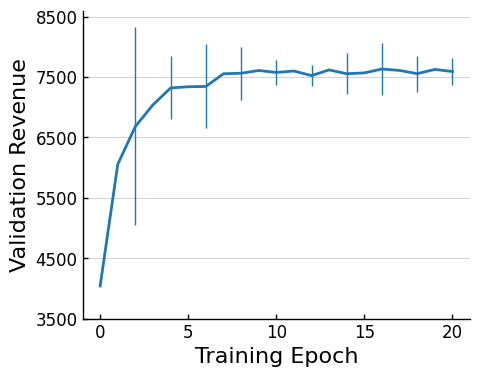

In [97]:
names = ['A2C2023-02-19-21-35-00','A2C2023-02-19-21-50-50','A2C2023-02-19-21-53-18','A2C2023-02-19-21-52-47','A2C2023-02-19-21-50-01']
list_ = []
for name in names:
    with open(r'log/' +name, 'r') as f:
        data = f.readlines()
        result_list = []
        for line in data:
            if 'initial mean reward' in line:
                seg = re.split(' |\n', line)[-2]
                result_list.append(float(seg))
            if 'validate reward:' in line:
                seg = re.split(' |\n', line)[-2]
                result_list.append(float(seg))
        list_.append(result_list)
list_ = np.array(list_) 
y = list_.mean(0)
err = list_.max(0)-list_.min(0)
steps = np.arange(len(result_list))
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))

x_major_locator=MultipleLocator(4)
ax1.xaxis.set_major_locator(x_major_locator)

plt.errorbar(steps, y*286.45, linewidth=2,yerr=err*286.45,errorevery=2,elinewidth=1,  )
#ax1.plot(steps[::3],result_list[::3],marker='D',markersize=7,color='#496C88')#color_rgb_list[3]
ax1.set_xlabel("Training Epoch",size=16)
ax1.set_ylabel('Validation Revenue',size=16)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(1);###设置底部坐标轴的粗细
ax1.spines['left'].set_linewidth(1);####设置左边坐标轴的粗细
ax1.tick_params(direction='in', width=1)
ax1.set_xlim(-1,21)
ax1.set_xticks(steps[::5],size=12)
ax1.set_ylim(3500,8600)
ax1.set_yticks(range(3500,8600,1000),size=12)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.savefig(r'plot/'+'expedia'+'_steps'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')           
plt.show()

/tmp/ipykernel_822043/3495680074.py:35: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


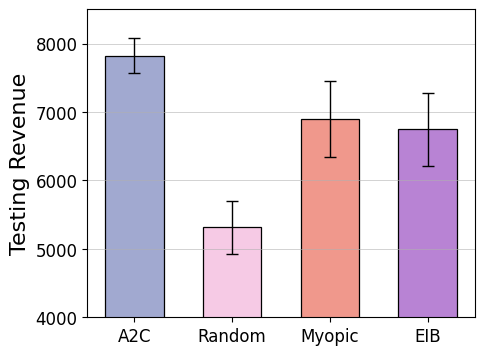

In [96]:
name = 'A2C2023-02-19-21-59-17'
with open(r'log/' + name, 'r') as f:
    data = f.readlines()
    OA_list = []
    Myopic_list = []
    EIB_list = []
    for line in data:
        if 'mean test reward:' in line:
            OA_list.append(float(line.split(',')[-3]))
            Myopic_list.append(float(line.split(',')[-2]))
            EIB_list.append(float(line.split(',')[-1]))

with open(r'log/' + name, 'r') as f:
    data = f.readlines()
    seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list.append(float(line.split(',')[-4][-8:]))


y = [np.mean(seller_list)*286.45, np.mean(OA_list)*286.45,np.mean(Myopic_list)*286.45, np.mean(EIB_list)*286.45]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
std_err = [(np.max(seller_list)-np.min(seller_list))*286.45,(np.max(OA_list)-np.min(OA_list))*286.45,
           (np.max(Myopic_list)-np.min(Myopic_list))*286.45,(np.max(EIB_list)-np.min(EIB_list))*286.45]
error_params=dict(elinewidth=1,ecolor='black',capsize=4)#设置误差标记参数

ax.bar([1,2,3,4],y,width=0.6,color=['#A1A9D0','#F6CAE5','#F0988C','#B883D4'],edgecolor='black',linewidth=0.9,yerr=std_err,error_kw=error_params,\
                    tick_label=['A2C', 'Random', 'Myopic', 'EIB'])
ax.set_ylim(4000,8500)
ax.set_yticks(range(4000,8500,1000),size=12)
plt.ylabel('Testing Revenue',size=16)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.savefig(r'plot/'+'expedia'+'_test'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')   

In [81]:
expedia_loss = np.load('resnet/train_loss.npy')
expedia_loss

array([3.17250276, 2.72206806, 2.49179108, 2.48765802, 2.48462837,
       2.48219043, 2.4798148 , 2.47654148, 2.47513342, 2.47068122,
       2.46770709, 2.46463573, 2.45982446, 2.45628294, 2.45026505,
       2.44530272, 2.44173741, 2.43541582, 2.42796045, 2.4218056 ,
       2.41631676])

/tmp/ipykernel_822043/3414114455.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y',linewidth=0.4 )


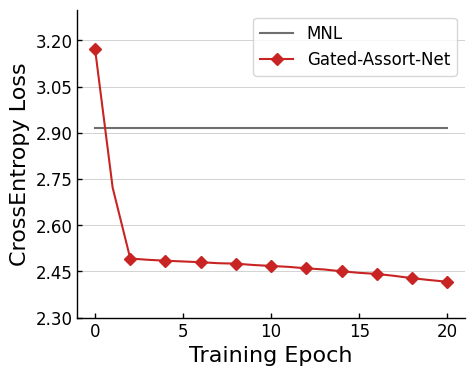

In [95]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
ax1.plot(range(len(expedia_loss)),[2.916]*len(expedia_loss),color='#6F6F6F',label='MNL')
ax1.plot(range(len(expedia_loss)),expedia_loss,color='#C82423',marker='D',markevery=2,label='Gated-Assort-Net')
ax1.set_xlabel("Training Epoch",size=16)
ax1.set_ylabel('CrossEntropy Loss',size=16)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(1);###设置底部坐标轴的粗细
ax1.spines['left'].set_linewidth(1);####设置左边坐标轴的粗细
ax1.tick_params(direction='in', width=1)
ax1.set_xlim(-1,21)
ax1.set_xticks(steps[::5],size=12)
ax1.set_ylim(2.3,3.3)
ax1.set_yticks(np.arange(2.3,3.3,0.15),size=12)
plt.grid(b=True, which='major',axis='y',linewidth=0.4 )
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.legend(loc='best',prop = {'size':12})
plt.savefig(r'plot/'+'Expedia_CrossEntropy_Loss'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')   